In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import timedelta
from sklearn.metrics import mean_squared_error

##### Считываем данные

In [2]:
data_weather =  pd.read_excel(r'C:\Users\Борис\JupyterProject\WeatherAPI\weatherSPB_2016_2019.xls', sheet_name = 'weather', 
                              parse_dates = ['date_time'], 
                              usecols = ['date_time', 'T', 'U', 'Td'])

# Конвертация поля date_time из типа object в тип datetime64
data_weather['date_time'] = data_weather['date_time'].astype('datetime64[ns]')

# Удаление Series с пустыми значениями
data_weather = data_weather.dropna(how = 'any', axis = 0)

# Запись данных в новые поля month и year
data_weather['month'] = data_weather['date_time'].dt.month
data_weather['year'] = data_weather['date_time'].dt.year

##### Перевод чисел в название месяцев

In [3]:
def month_name_rus(num):
    """Функция, для преобразования числа в название месяца на русском языке"""
    
    ru = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь',
          'октябрь', 'ноябрь', 'декабрь']
    return ru[num - 1]

##### Поиск максимальной и минимальной температуры

In [4]:
def min_max_search(df):
    """Функция для поиска максимального и минимального значения температуры из входного DataFrame"""
    
    # Создание DataFrame min_max_df и запись в него min и max от T
    min_max_df = df.groupby('month', as_index=False).agg({'T': ['min', 'max']})
    
    # Применение функции month_name_rus к полю month
    min_max_df['month'] = min_max_df['month'].apply(month_name_rus)
    
    # Переименование колонок
    min_max_df.columns = ['Месяц', 'Минимальная T', 'Максимальная T']
    
    # Запись в Excel
    min_max_df.to_excel('./output_min_max_t.xls', index=False)

    return min_max_df

##### Прогнозирование погоды

In [12]:
def forecast_weather(df):
    """Функиця прогнозирования температуры на январь 2020 года"""
    
    # Создание нового DataFrame для обучения
    jan_df = df[(df['month'] == 1)]
    jan_df = jan_df.dropna(how = 'any', axis = 0)
    
    # Создание тестовых и обучаемых данных
    features = jan_df.drop(['T','date_time', 'month', 'year'], axis=1)
    temp = jan_df['T'] 
    X_train, X_test, Y_train, Y_test = train_test_split(features, temp, test_size=0.2, shuffle= False)
    
    # Создание и тренировка объекта линейной регрессии
    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)
    
    # Запись в новый DataFrame input_df_result данных о январе 2019 года
    input_df_result = df[(df['month'] == 1)  & (df['year'] == 2019)]
    
    # Объединение данных по полю date_time
    input_df_result = input_df_result.groupby('date_time', as_index=False)
    
    # Добавление года к дате
    input_df_result = input_df_result.first()['date_time'] + timedelta(days=365)
 
    # Выбор 31 дня из предсказанных данных
    pred = regressor.predict(X_test)[:31]
    
    # Добавление данных о предсказанной температуре
    input_df_result = pd.concat([input_df_result, pd.DataFrame(pred, columns=["Температура"])], axis=1)
    
    # Преобразование вывода температуры
    input_df_result['Температура'] = input_df_result['Температура'].map('{:,.1f}'.format).astype('float64')
    
    # Запись в Excel
    input_df_result.to_excel('./predict_weather.xls', index=False)
    
    # Средняя квадратичная ошибка
    mse = mean_squared_error(Y_test, regressor.predict(X_test))
    print("MSE", mse)
    
    return input_df_result

##### Вызов функций

In [13]:
min_max_search(data_weather)
forecast_weather(data_weather)

MSE 0.011323081452484477


<ipython-input-4-0f9b81d8d613>:14: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  min_max_df.to_excel('./output_min_max_t.xls', index=False)
<ipython-input-12-c53cd0b319b7>:36: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warn

,date_time,Температура
0,2020-01-01,-6.8
1,2020-01-02,-7.4
2,2020-01-03,-7.5
3,2020-01-04,-7.9
4,2020-01-05,-8.1
5,2020-01-06,-8.3
6,2020-01-07,-8.2
7,2020-01-08,-5.5
8,2020-01-09,-5.3
9,2020-01-10,-6.7


##### Построение графика

<ipython-input-12-c53cd0b319b7>:36: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  input_df_result.to_excel('./predict_weather.xls', index=False)


MSE 0.011323081452484477


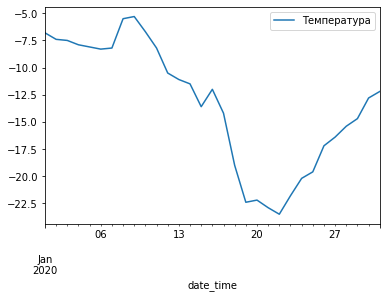

In [14]:
forecast_weather(data_weather).plot(x='date_time', y=['Температура'])
plt.show()